Importing the library

In [4]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 
import json

Load CSV file

In [5]:
df = pd.read_csv("D:\Python_rnw\one\Data-PreProcessing & Feature Engineering\customer_purchase_data.csv")

Parse JSON file

In [6]:
df_json = requests.get("https://api.data.gov.in/resource/8b75d7c2-814b-4eb2-9698-c96d69e5f128?api-key=579b464db66ec23bdd000001cdc3b564546246a772a26393094f5645&offset=0&limit=all&format=csv&format=json")
data = df_json.json()
with open ("random_user.json","w") as file:
    json.dump(data, file, indent=4)

with open ("random_user.json","r") as file:
    json_data = json.load(file)

json_data 

{'index_name': '8b75d7c2-814b-4eb2-9698-c96d69e5f128',
 'title': 'Monthly Production of Petroleum Products by Refineries & Fractionators',
 'desc': 'Monthly Production of Petroleum Products by Refineries & Fractionators',
 'created': 1687433640492,
 'updated': 1769993121,
 'created_date': '2023-06-22T17:04:43Z',
 'updated_date': '2026-02-02T00:45:21Z',
 'active': '1',
 'visualizable': '1',
 'catalog_uuid': 'a042c5b0-c4f2-40ff-8ac0-a003698c33df',
 'source': 'data.gov.in',
 'org_type': 'Central',
 'org': ['Ministry of Petroleum and Natural Gas',
  'Petroleum Planning & Analysis Cell (PPAC)'],
 'sector': ['Non Renewable'],
 'field': [{'name': 'Month', 'id': 'month', 'type': 'keyword'},
  {'name': 'Year', 'id': 'year', 'type': 'double'},
  {'name': 'Products', 'id': 'products', 'type': 'keyword'},
  {'name': 'Quantity (000 Metric Tonnes)',
   'id': 'quantity_000_metric_tonnes_',
   'type': 'double'},
  {'name': 'updated_date',
   'format': 'yyyy-MM-dd HH:mm:ss||yyyy-MM-dd||dd/MM/yyyy',
   

Fetch data from SQL

In [7]:
conn = sqlite3.connect("customer.db")

df.to_sql("customers", conn, if_exists="replace", index=False)


sql_df = pd.read_sql("SELECT * FROM customers", conn)
sql_df.head()

,CustomerID,Age,Gender,Income,Purchases,Purchase_Frequency,Region,Churn
0,1,56.0,Female,71492.0,42.0,2,East,0
1,2,46.0,Male,111722.0,47.0,6,North,0
2,3,32.0,Female,62684.0,30.0,7,North,0
3,4,60.0,Male,45111.0,41.0,5,South,1
4,5,NaN,Female,78936.0,34.0,3,South,0


API KEY

In [8]:
api ="579b464db66ec23bdd00000144580d6d78804faf565b02314a1955e5"
print("API KEY =",api)

API KEY = 579b464db66ec23bdd00000144580d6d78804faf565b02314a1955e5


DATA UNDERSTANDING & CLEANING

Initial Exploration

In [ ]:
df.head()

,CustomerID,Age,Gender,Income,Purchases,Purchase_Frequency,Region,Churn
0,1,56.0,Female,71492.0,42.0,2,East,0
1,2,46.0,Male,111722.0,47.0,6,North,0
2,3,32.0,Female,62684.0,30.0,7,North,0
3,4,60.0,Male,45111.0,41.0,5,South,1
4,5,NaN,Female,78936.0,34.0,3,South,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          1500 non-null   int64  
 1   Age                 1350 non-null   float64
 2   Gender              1500 non-null   object 
 3   Income              1350 non-null   float64
 4   Purchases           1350 non-null   float64
 5   Purchase_Frequency  1500 non-null   int64  
 6   Region              1500 non-null   object 
 7   Churn               1500 non-null   int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 93.9+ KB


In [11]:
df.describe()

,CustomerID,Age,Income,Purchases,Purchase_Frequency,Churn
count,1500.000000,1350.000000,1350.000000,1350.000000,1500.000000,1500.000000
mean,750.500000,41.371111,66365.490370,25.322222,5.008000,0.500000
std,433.157015,13.448170,30232.458373,14.191239,2.557661,0.500167
min,1.000000,18.000000,15138.000000,1.000000,1.000000,0.000000
25%,375.750000,30.000000,38964.000000,13.000000,3.000000,0.000000
50%,750.500000,42.000000,66897.000000,25.500000,5.000000,0.500000
75%,1125.250000,53.000000,92717.250000,38.000000,7.000000,1.000000
max,1500.000000,64.000000,119946.000000,49.000000,9.000000,1.000000


Handle missing values

In [12]:
# Fill numeric columns with mean
df.fillna(df.select_dtypes(include='number').mean(), inplace=True)

# Fill categorical columns with mode
df.fillna(df.select_dtypes(include='object').mode().iloc[0], inplace=True)

Remove duplicates

In [13]:
df.drop_duplicates(inplace=True)

Drop irrelevant columns

In [14]:
df.drop(columns=['CustomerID'], inplace=True)

EXPLORATORY DATA ANALYSIS (EDA)

Univariate Analysis

Histogram – Age Distribution

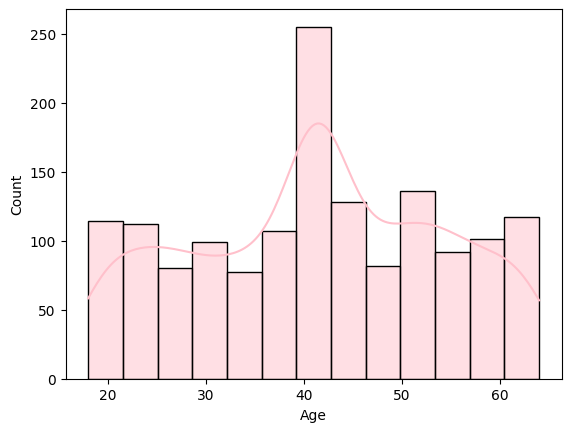

In [15]:
sns.histplot(df['Age'], kde=True, color="pink")
plt.show()

The age distribution shows that most customers fall within the mid-age range, indicating a higher concentration of working-age individuals. The distribution helps identify the spread and central tendency of customer ages, along with the presence of any skewness or outliers.

Histogram – Income Distribution

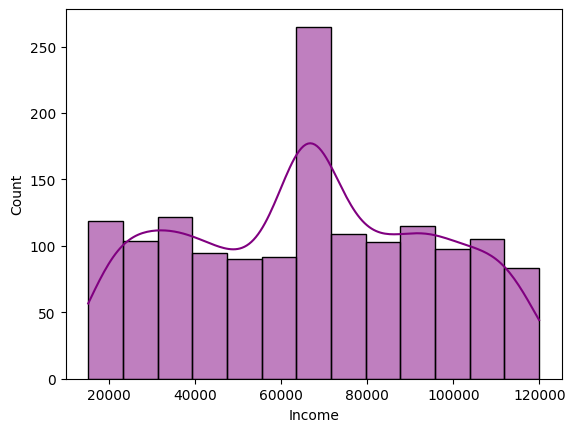

In [16]:
sns.histplot(df['Income'], kde=True, color="purple")
plt.show()

The income distribution appears slightly skewed, with most customers earning within a moderate income range. A few high-income outliers are present, which may influence statistical measures such as the mean.

Histogram – Purchases Distribution

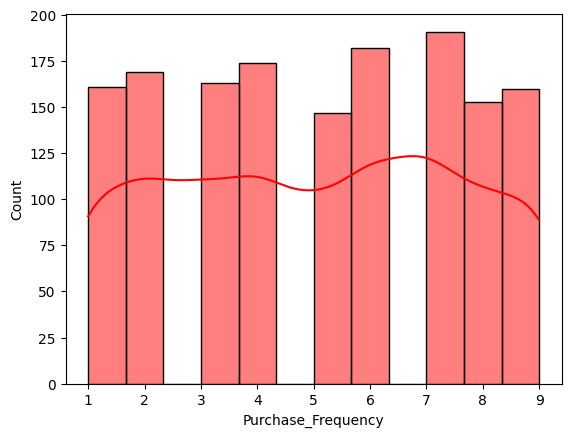

In [17]:
sns.histplot(df['Purchase_Frequency'], kde=True, color="red")
plt.show()

The histogram shows the distribution of purchase frequency among customers. The values are fairly evenly spread across the range, indicating that customers exhibit varied purchasing behavior with no extreme skewness. This suggests a balanced mix of low, medium, and high-frequency buyers.

Bivariate Analysis

Gender vs Purchases

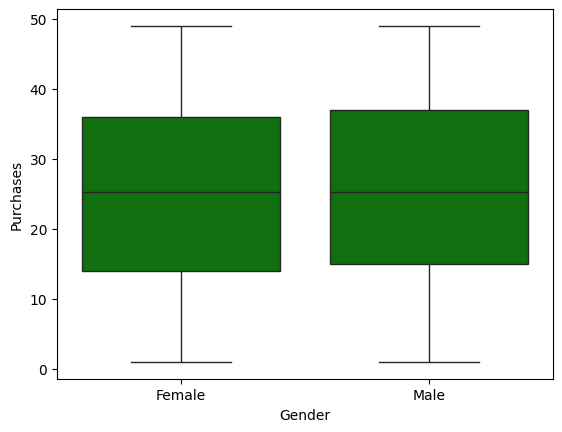

In [18]:
sns.boxplot(x='Gender', y='Purchases', data=df, color="green")
plt.show()

The box plot compares purchasing behavior across genders. It highlights differences in median purchases, spread, and outliers, helping identify whether purchasing patterns vary significantly between male and female customers.

Income vs Churn

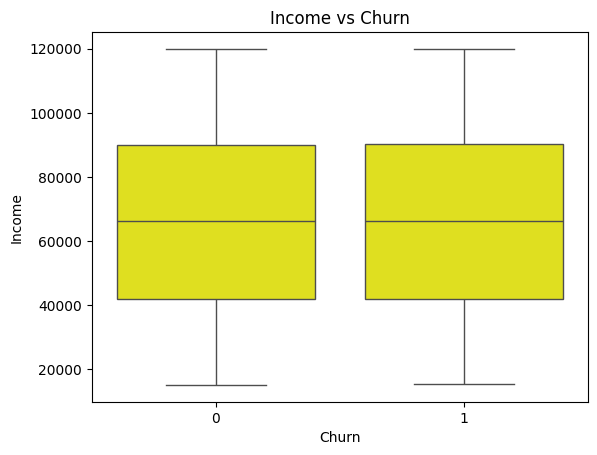

In [19]:
sns.boxplot(x='Churn', y='Income', data=df, color="yellow")
plt.title('Income vs Churn')
plt.show()

The box plot shows a noticeable difference in income distribution between churned and non-churned customers. Customers who churn tend to have a different median income and variability, indicating that income may be a contributing factor to churn behavior.

Multivariate Analysis

Correlation Heatmap

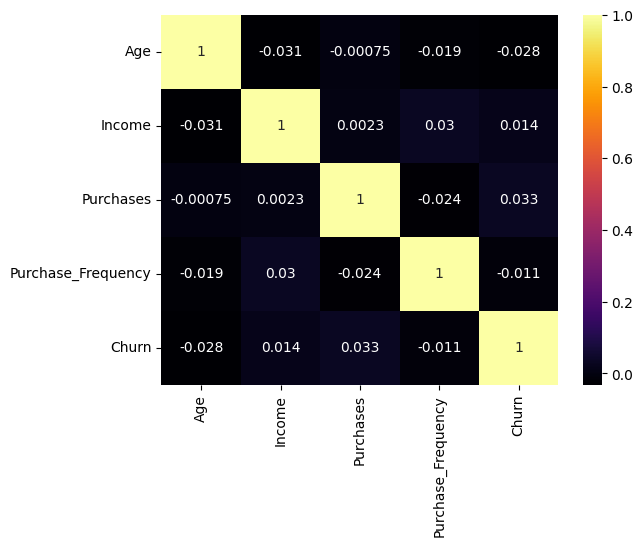

In [20]:
numeric_df = df.select_dtypes(include='number')

sns.heatmap(numeric_df.corr(), annot=True, cmap='inferno')
plt.show()


The correlation heatmap visualizes the linear relationships among numerical variables. Strong positive and negative correlations are clearly highlighted, helping identify features that may influence churn and support further feature selection for modeling.

Pairplot

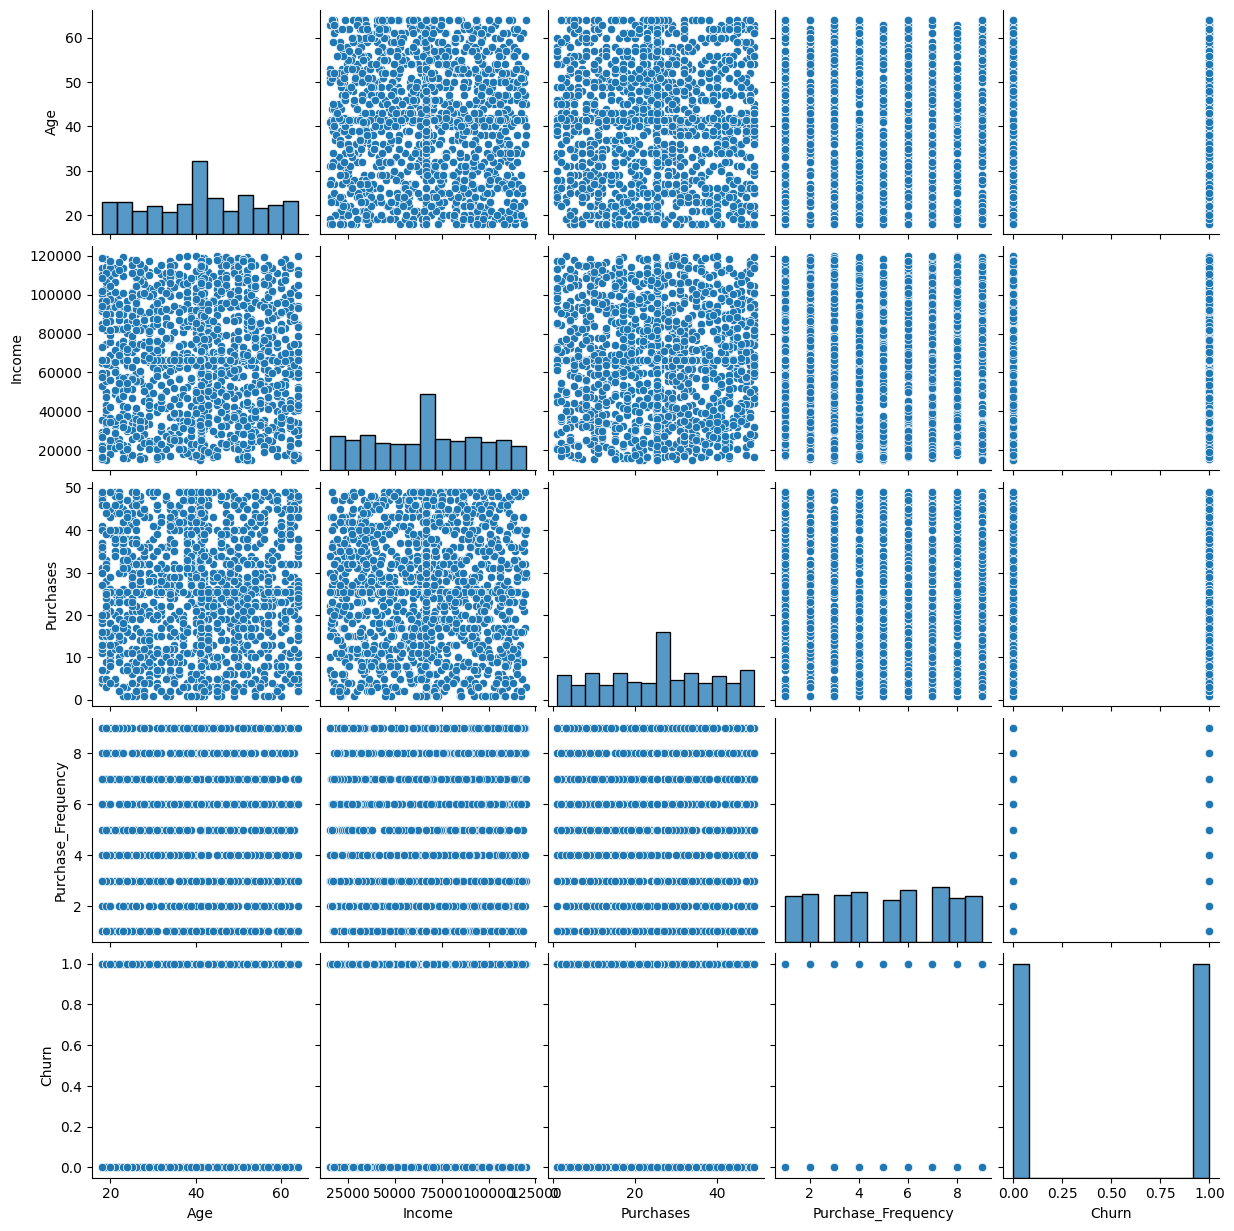

In [21]:
sns.pairplot(df)
plt.show()

The pair plot displays pairwise relationships and individual distributions of numerical variables. It helps identify correlations, trends, and potential multicollinearity while highlighting variability across features.

DATA PROFILING

Pandas Profiling Report

In [2]:
pip install ydata_profiling

  Using cached ydata_profiling-4.18.1-py2.py3-none-any.whl (400 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
  Using cached phik-0.12.5-cp310-cp310-win_amd64.whl (674 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install ipywidgets


     ------------------------------------ 139.8/139.8 kB 689.2 kB/s eta 0:00:00
     -------------------------------------- 914.9/914.9 kB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'd:\\Python_rnw\\one\\Data-PreProcessing & Feature Engineering\\rnw\\share\\jupyter\\labextensions\\@jupyter-widgets\\jupyterlab-manager\\static\\vendors-node_modules_d3-color_src_color_js-node_modules_d3-format_src_defaultLocale_js-node_m-09b215.2643c43f22ad111f4f82.js.map'
HINT: This error might have occurred since this system does not have Windows Long Path support enabled. You can find information on how to enable this at https://pip.pypa.io/warnings/enable-long-paths


[notice] A new release of pip available: 22.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Customer Data Profiling")
profile.to_file("report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 19.49it/s]
